In [6]:
# import the necessary packages
import numpy as np
import imutils
import cv2
from PIL import Image
from IPython.display import display

def is_contour_bad(c):
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
    # the contour is 'bad' if it is not a rectangle
    return not len(approx) == 4

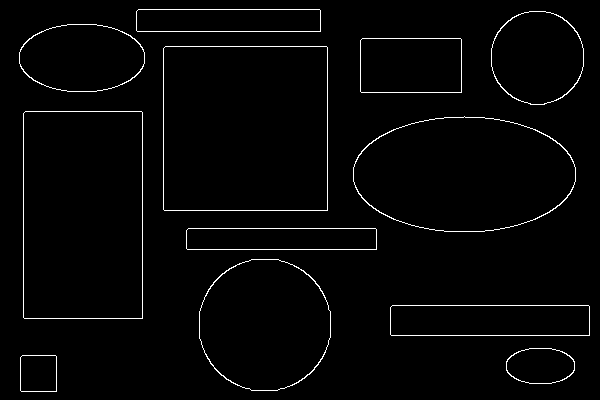

In [9]:
image = cv2.imread(r'/mnt/c/Users/yamshee.fatima/Desktop/image & OCR/shapes.png')
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
edged = cv2.Canny(gray, 50, 100)
display(Image.fromarray(edged))

In [19]:
# find contours in the image and initialize the mask that will be used to remove the bad contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
#back ground -mask
mask = np.ones(image.shape[:2], dtype="uint8") * 255


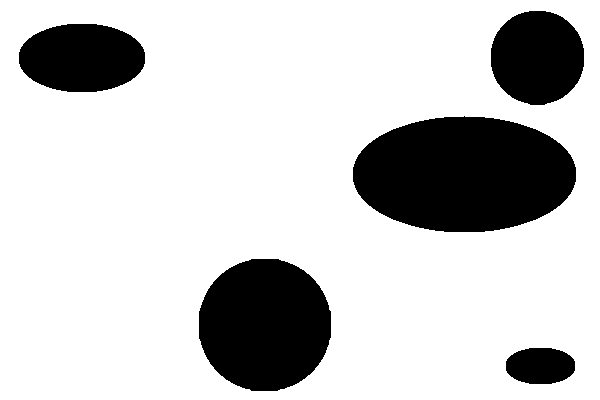

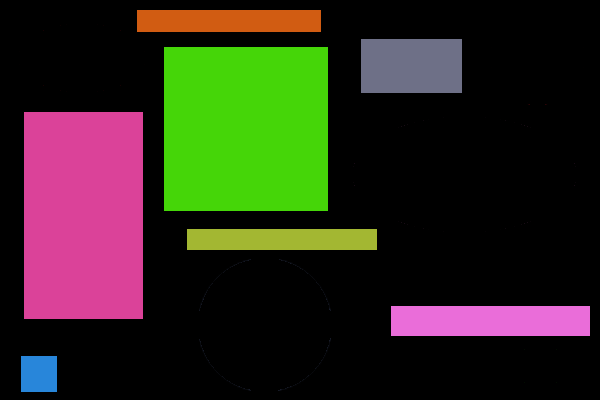

In [22]:
# loop over the contours
for c in cnts:
    # if the contour is bad, draw it on the mask
    if is_contour_bad(c):
        cv2.drawContours(mask, [c], -1, 0, -1)
 
# remove the contours from the image and show the resulting images
image = cv2.bitwise_and(image, image, mask=mask)
display(Image.fromarray(mask))
display(Image.fromarray(image))